In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
#data
bottle_h = [11,9,7,5]
t = [77,115,194,650]
#P = [107.91,88.29,68.67,49.05]

#constants
tube_r = ['?','?','?','?']
tube_l = [20.5,20.5,20.5,20.5]
d = [1,1,1,1]
g = [9.81,9.81,9.81,9.81]
vol = [2,2,2,2]

#df
data = (bottle_h,tube_r,tube_l,t,d,g,vol)
df = pd.DataFrame(data)
df = df.transpose()

df.columns = ['bottle_h (cm)', 'tube_r (cm)', 'tube_l (cm)','t (s)','d (g/cm³)', 'g (cm/s2)', 'volume out (ml)']

df['g (cm/s2)'] = df['g (cm/s2)'] * 100                                                    #unit system convertion
df

,bottle_h (cm),tube_r (cm),tube_l (cm),t (s),d (g/cm³),g (cm/s2),volume out (ml)
0,11,?,20.5,77,1,981.0,2
1,9,?,20.5,115,1,981.0,2
2,7,?,20.5,194,1,981.0,2
3,5,?,20.5,650,1,981.0,2


In [374]:
df["P (kPa)"] = df["bottle_h (cm)"] * df["d (g/cm³)"] * df["g (cm/s2)"]                        #pressure

df["tube_r (cm)"] = ((df["volume out (ml)"][0]) /(np.pi * df["bottle_h (cm)"][0]))**(1/2)      #tube r

df["v/t (ml/s)"] = df["volume out (ml)"] / df["t (s)"]
df

,bottle_h (cm),tube_r (cm),tube_l (cm),t (s),d (g/cm³),g (cm/s2),volume out (ml),P (kPa),v/t (ml/s)
0,11,0.240571,20.5,77,1,981.0,2,10791.0,0.025974
1,9,0.240571,20.5,115,1,981.0,2,8829.0,0.017391
2,7,0.240571,20.5,194,1,981.0,2,6867.0,0.010309
3,5,0.240571,20.5,650,1,981.0,2,4905.0,0.003077


In [375]:
df["p_v_t"] = df["P (kPa)"] / df["v/t (ml/s)"]

line_feat = np.polyfit(df["v/t (ml/s)"].tolist(),df["P (kPa)"].tolist(),1)
print("y = {m} * x + {b}".format(m = line_feat[0],b = line_feat[1]))
print("m is also equal to Epsilon: ε = {m} ".format(m = line_feat[0]))

df["Puvaz (Pa.s)"] = (np.pi *df["tube_r (cm)"]**4 * line_feat[0]) / (8 * 20.5)    #should be stable for all conditions
c = ["P (kPa)","bottle_h (cm)","v/t (ml/s)","Puvaz (Pa.s)","tube_r (cm)"]
df = df[c]


y = 258397.13605283835 * x + 4181.891682342894
m is also equal to Epsilon: ε = 258397.13605283835 


,P (kPa),bottle_h (cm),v/t (ml/s),Puvaz (Pa.s),tube_r (cm)
0,10791.0,11,0.025974,16.579392,0.240571
1,8829.0,9,0.017391,16.579392,0.240571
2,6867.0,7,0.010309,16.579392,0.240571
3,4905.0,5,0.003077,16.579392,0.240571


Text(0.5, 0, 'V/t (ml/s)')

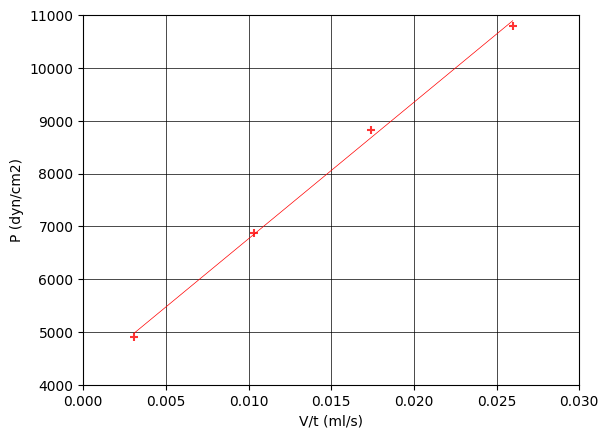

In [377]:
sns.regplot(x=df["v/t (ml/s)"].tolist(), y=df["P (kPa)"].tolist(), data=df, color="red", marker="+",scatter_kws={"s": 30}, line_kws={"linewidth": 0.5}, ci=None, truncate=True, order=1)

plt.grid(axis="both",    which="both",    color="black",    linestyle="-",linewidth=0.5)

plt.xlim(0,0.03)
plt.ylim(4000,11000)

plt.ylabel("P (dyn/cm2)")
plt.xlabel("V/t (ml/s)")